<a href="https://colab.research.google.com/github/mulgreat/ELEC-6601/blob/main/Programming%20Assignment%20%233_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-6ff21b21389a>:40: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, x_n, basefmt=" ", use_line_collection=True)
<ipython-input-3-6ff21b21389a>:46: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, x_n_recovered, basefmt=" ", use_line_collection=True)


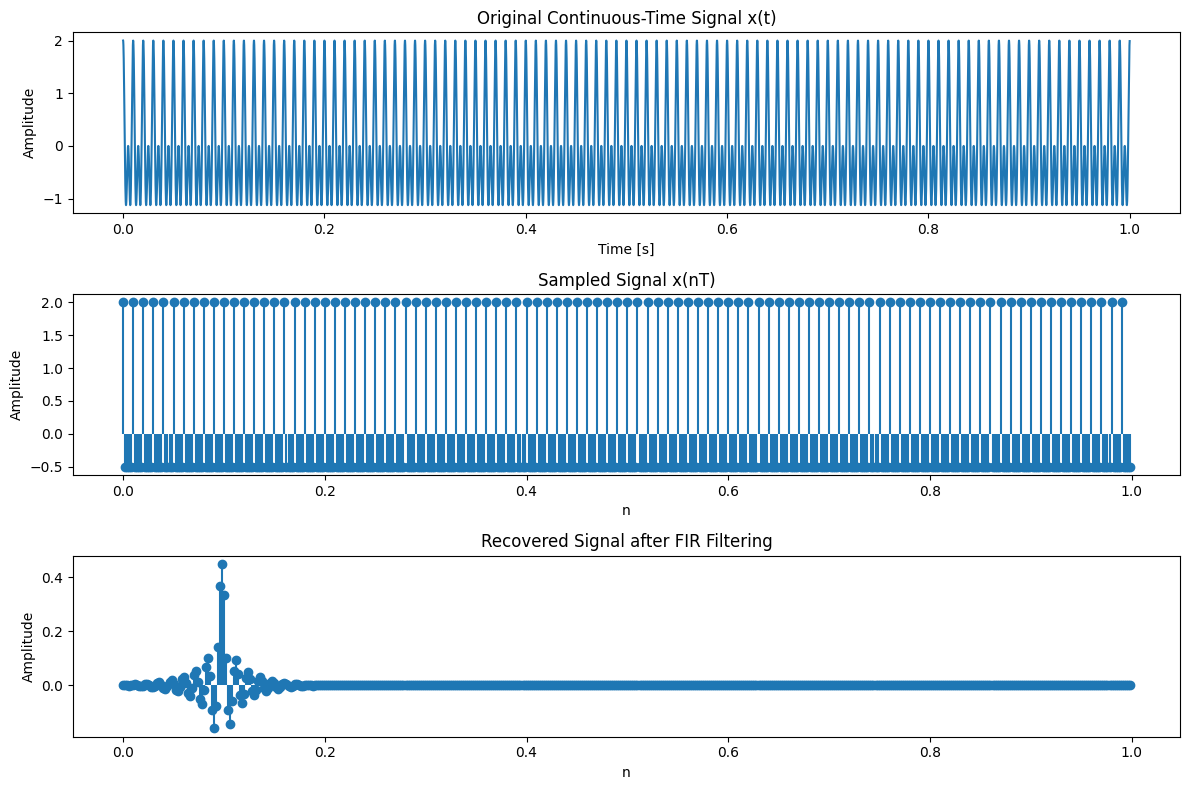

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Define signal parameters
Omega1 = 2 * np.pi * 100  # Frequency 100 Hz in rad/s
Omega2 = 2 * np.pi * 200  # Frequency 200 Hz in rad/s
fs = 500  # Sampling frequency 500 Hz
T = 1 / fs  # Sampling period
duration = 1  # Signal duration in seconds
t = np.arange(0, duration, 1e-4)  # High-resolution time vector for original signal

# Continuous-time signal
x_t = np.cos(Omega1 * t) + np.cos(Omega2 * t)

# Sample the signal
n = np.arange(0, duration, T)
x_n = np.cos(Omega1 * n) + np.cos(Omega2 * n)

# Design a high-order FIR filter (Low-pass)
numtaps = 101  # Number of filter taps (order of the filter + 1)
cutoff = 1 / 3  # Cutoff frequency normalized to Nyquist rate (250 Hz / 500 Hz / 2)

# FIR filter coefficients
fir_coeff = firwin(numtaps, cutoff)

# Filter the sampled signal
x_n_recovered = lfilter(fir_coeff, 1.0, x_n)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x_t)
plt.title('Original Continuous-Time Signal x(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.stem(n, x_n, basefmt=" ", use_line_collection=True)
plt.title('Sampled Signal x(nT)')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.stem(n, x_n_recovered, basefmt=" ", use_line_collection=True)
plt.title('Recovered Signal after FIR Filtering')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
